In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/etkiketli.csv")
df_tr=pd.read_csv("/content/drive/MyDrive/yeni_temiz_Metin.csv")
df_tr.head()

,Unnamed: 0,0
0,0,kızıma aldım iphone plus gb den geçiş yaptı me...
1,1,eşime hediye olarak aldım memnun satıcının hep...
2,2,hepsiburada satıcısından aldım güne elime ulaş...
3,3,hızlı kargo süper telefon
4,4,burada lira düşük fiyata aldım teşekkürler


In [ ]:
#sns.factorplot(x="Analysis", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")


In [ ]:
#tf1 = (df["yorum"]).apply(lambda x: 
                             #pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_turk = (df_tr["0"]).apply(lambda x: 
                             pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [ ]:
tf_turk.columns = ["words","tf"]

In [ ]:
tf_turk.head()

,words,tf
0,kızıma,13.0
1,sipariş,501.0
2,hak,35.0
3,övgüyü,2.0
4,türlü,16.0


In [ ]:
tf_turk.nunique()

words    17991
tf         256
dtype: int64

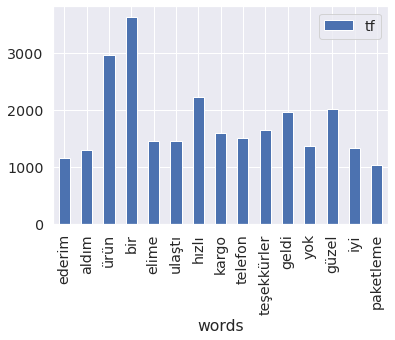

In [ ]:
a = tf_turk[tf_turk["tf"] > 1000]
a.plot.bar(x = "words", y = "tf");

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
text = " ".join(i for i in df_tr["0"])

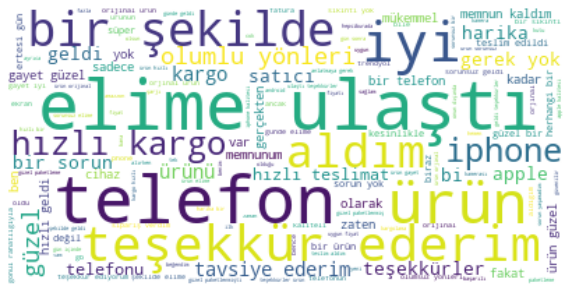

In [ ]:
wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
df1 = pd.DataFrame()
df1["text"] = df["yorum"]
df1["label"] = df["Analysis"]

In [ ]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df1["text"],
                                                                   df1["label"], 
                                                                    random_state = 1)

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [ ]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [ ]:
vectorizer.get_feature_names()[0:5]

['aa', 'aaa', 'abandon', 'abest', 'able']

In [ ]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TfidfVectorizer()

In [ ]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

TfidfVectorizer()

In [ ]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [ ]:
tf_idf_word_vectorizer.get_feature_names()[0:5]

['aa', 'aaa', 'abandon', 'abest', 'able']

In [ ]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)

TfidfVectorizer(ngram_range=(2, 3))

In [ ]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

In [ ]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [ ]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

Logistic Regression

In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()
print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8805986664775146


In [ ]:
x_test_count.shape

(2655, 4548)

In [ ]:
test_y.shape

(2655,)

In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.8165683075613563


In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.725809334657398


In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.8282508157185416


Bayes


In [ ]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.7344573698396936


In [ ]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.7133735281600228


In [ ]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.7122428713292666


In [ ]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.7129961696694567


Random forest

In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8252333664349554


In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.7996127110228402


In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.7325932756419349


In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.8022556390977442


Bert-tokenizer

In [ ]:
import numpy as np
prep_data_dir="/content/drive/MyDrive/"
x_train = np.load(prep_data_dir + '/x_train.npy')
y_train = np.load(prep_data_dir + '/y_train.npy')
x_val = np.load(prep_data_dir + '/x_val.npy')
y_val = np.load(prep_data_dir + '/y_val.npy')

In [ ]:
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_test = rf.predict(x_val)
class_names = ["Negatif","Neutar","Positive"]

print(classification_report(y_val, y_pred_test,target_names=class_names))

              precision    recall  f1-score   support

     Negatif       0.40      0.01      0.02       203
      Neutar       0.84      0.20      0.32       402
    Positive       0.75      0.99      0.85      1519

    accuracy                           0.75      2124
   macro avg       0.66      0.40      0.40      2124
weighted avg       0.73      0.75      0.67      2124



In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy= "uniform")
dummy.fit(x_train,y_train)

DummyClassifier(strategy='uniform')

In [ ]:
y_pred_test = dummy.predict(x_val)
class_names = ["Negatif","Neutar","Positive"]
print(classification_report(y_val, y_pred_test,target_names=class_names))

              precision    recall  f1-score   support

     Negatif       0.10      0.37      0.16       203
      Neutar       0.18      0.32      0.23       402
    Positive       0.72      0.33      0.45      1519

    accuracy                           0.33      2124
   macro avg       0.34      0.34      0.28      2124
weighted avg       0.56      0.33      0.38      2124



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_test = model.predict(x_val)
class_names = ["Negatif","Neutar","Positive"]
print(classification_report(y_val, y_pred_test,target_names=class_names))

              precision    recall  f1-score   support

     Negatif       0.27      0.08      0.13       203
      Neutar       0.48      0.39      0.43       402
    Positive       0.78      0.89      0.83      1519

    accuracy                           0.72      2124
   macro avg       0.51      0.46      0.47      2124
weighted avg       0.68      0.72      0.69      2124



In [ ]:
#from utils import display_pca_scatterplot

In [ ]:
#display_pca_scatterplot(x_train, y_train, 1000)